<a href="https://colab.research.google.com/github/serahnjogu-new/Calculator/blob/main/Machine_Learning_pipeline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [93]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error



Loading the Dataset

In [15]:
# Loading and viewing the dataset
df = pd.read_csv ("/content/spotify.csv")
df.head()

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


Inspecting the Dataset

In [16]:
# Getting Information about the Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  32833 non-null  object 
 1   track_name                32828 non-null  object 
 2   track_artist              32828 non-null  object 
 3   track_popularity          32833 non-null  int64  
 4   track_album_id            32833 non-null  object 
 5   track_album_name          32828 non-null  object 
 6   track_album_release_date  32833 non-null  object 
 7   playlist_name             32833 non-null  object 
 8   playlist_id               32833 non-null  object 
 9   playlist_genre            32833 non-null  object 
 10  playlist_subgenre         32833 non-null  object 
 11  danceability              32833 non-null  float64
 12  energy                    32833 non-null  float64
 13  key                       32833 non-null  int64  
 14  loudne

In [17]:
# Getting the shape of the Dataset
df.shape
print ("Number of Rows: ", df.shape[0])
print ("Number of Columns: ", df.shape[1])

Number of Rows:  32833
Number of Columns:  23


In [18]:
# Describing the dataset
df.describe()

,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
count,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000
mean,42.477081,0.654850,0.698619,5.374471,-6.719499,0.565711,0.107068,0.175334,0.084747,0.190176,0.510561,120.881132,225799.811622
std,24.984074,0.145085,0.180910,3.611657,2.988436,0.495671,0.101314,0.219633,0.224230,0.154317,0.233146,26.903624,59834.006182
min,0.000000,0.000000,0.000175,0.000000,-46.448000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4000.000000
25%,24.000000,0.563000,0.581000,2.000000,-8.171000,0.000000,0.041000,0.015100,0.000000,0.092700,0.331000,99.960000,187819.000000
50%,45.000000,0.672000,0.721000,6.000000,-6.166000,1.000000,0.062500,0.080400,0.000016,0.127000,0.512000,121.984000,216000.000000
75%,62.000000,0.761000,0.840000,9.000000,-4.645000,1.000000,0.132000,0.255000,0.004830,0.248000,0.693000,133.918000,253585.000000
max,100.000000,0.983000,1.000000,11.000000,1.275000,1.000000,0.918000,0.994000,0.994000,0.996000,0.991000,239.440000,517810.000000


Data cleaning

In [19]:
# Viewing the column names as a list
print(df.columns.tolist())

['track_id', 'track_name', 'track_artist', 'track_popularity', 'track_album_id', 'track_album_name', 'track_album_release_date', 'playlist_name', 'playlist_id', 'playlist_genre', 'playlist_subgenre', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']


In [20]:
# Removing the name track for convinience
df.columns = df.columns.str.replace('^track_', '', regex=True)
df.head()


,id,name,artist,popularity,album_id,album_name,album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


In [41]:
# Checking duplicates
df.duplicated().sum()

np.int64(0)

In [21]:
# Check for missing values per column
df.isnull().sum()

,0
id,0
name,5
artist,5
popularity,0
album_id,0
album_name,5
album_release_date,0
playlist_name,0
playlist_id,0
playlist_genre,0


In [22]:
# New Dataframe with only columns with missing values
df_missing = df[df.isnull().any(axis=1)]
df_missing.head()

,id,name,artist,popularity,album_id,album_name,album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
8151,69gRFGOWY9OMpFJgFol1u0,NaN,NaN,0,717UG2du6utFe7CdmpuUe3,NaN,2012-01-05,HIP&HOP,5DyJsJZOpMJh34WvUrQzMV,rap,...,6,-7.635,1,0.1760,0.0410,0.00000,0.1160,0.649,95.999,282707
9282,5cjecvX0CmC9gK0Laf5EMQ,NaN,NaN,0,3luHJEPw434tvNbme3SP8M,NaN,2017-12-01,GANGSTA Rap,5GA8GDo7RQC3JEanT81B3g,rap,...,11,-5.364,0,0.3190,0.0534,0.00000,0.5530,0.191,146.153,202235
9283,5TTzhRSWQS4Yu8xTgAuq6D,NaN,NaN,0,3luHJEPw434tvNbme3SP8M,NaN,2017-12-01,GANGSTA Rap,5GA8GDo7RQC3JEanT81B3g,rap,...,10,-5.907,0,0.3070,0.0963,0.00000,0.0888,0.505,86.839,206465
19568,3VKFip3OdAvv4OfNTgFWeQ,NaN,NaN,0,717UG2du6utFe7CdmpuUe3,NaN,2012-01-05,Reggaeton viejito🔥,0si5tw70PIgPkY1Eva6V8f,latin,...,11,-6.075,0,0.0366,0.0606,0.00653,0.1030,0.726,97.017,252773
19811,69gRFGOWY9OMpFJgFol1u0,NaN,NaN,0,717UG2du6utFe7CdmpuUe3,NaN,2012-01-05,latin hip hop,3nH8aytdqNeRbcRCg3dw9q,latin,...,6,-7.635,1,0.1760,0.0410,0.00000,0.1160,0.649,95.999,282707


In [23]:
# Dropping the missing values
df = df.dropna()
df.head ()

,id,name,artist,popularity,album_id,album_name,album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


In [24]:
# Checking whether there is any missing value after cleaning
df.isnull().sum()

,0
id,0
name,0
artist,0
popularity,0
album_id,0
album_name,0
album_release_date,0
playlist_name,0
playlist_id,0
playlist_genre,0


In [25]:
# Deleting the Missing values Dataframe
del df_missing


In [26]:
# Checking the data types of each column
df.dtypes

,0
id,object
name,object
artist,object
popularity,int64
album_id,object
album_name,object
album_release_date,object
playlist_name,object
playlist_id,object
playlist_genre,object


In [27]:
# Descriptive statistics after cleaning
df.describe()

,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
count,32828.000000,32828.000000,32828.000000,32828.000000,32828.000000,32828.000000,32828.000000,32828.000000,32828.000000,32828.000000,32828.000000,32828.000000,32828.000000
mean,42.483551,0.654850,0.698603,5.373949,-6.719529,0.565737,0.107053,0.175352,0.084760,0.190175,0.510556,120.883642,225796.829779
std,24.980476,0.145092,0.180916,3.611572,2.988641,0.495667,0.101307,0.219644,0.224245,0.154313,0.233152,26.903632,59836.492346
min,0.000000,0.000000,0.000175,0.000000,-46.448000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4000.000000
25%,24.000000,0.563000,0.581000,2.000000,-8.171250,0.000000,0.041000,0.015100,0.000000,0.092700,0.331000,99.961000,187804.500000
50%,45.000000,0.672000,0.721000,6.000000,-6.166000,1.000000,0.062500,0.080400,0.000016,0.127000,0.512000,121.984000,216000.000000
75%,62.000000,0.761000,0.840000,9.000000,-4.645000,1.000000,0.132000,0.255000,0.004830,0.248000,0.693000,133.918250,253581.250000
max,100.000000,0.983000,1.000000,11.000000,1.275000,1.000000,0.918000,0.994000,0.994000,0.996000,0.991000,239.440000,517810.000000


In [29]:
# Changing the data type of album_release_date to datetime
df['album_release_date'] = pd.to_datetime(df['album_release_date'], format='mixed')
df.head()

,id,name,artist,popularity,album_id,album_name,album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


In [30]:
# Checking the data type after changing
df.dtypes

,0
id,object
name,object
artist,object
popularity,int64
album_id,object
album_name,object
album_release_date,datetime64[ns]
playlist_name,object
playlist_id,object
playlist_genre,object


In [34]:
# Checking the column names
df.columns

Index(['id', 'name', 'artist', 'popularity', 'album_id', 'album_name',
       'album_release_date', 'playlist_name', 'playlist_id', 'playlist_genre',
       'playlist_subgenre', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms'],
      dtype='object')

In [37]:
# Extracting the months of the release date
df['album_release_date'].dt.month_name()


,album_release_date
0,June
1,December
2,July
3,July
4,March
...,...
32828,April
32829,March
32830,April
32831,January


In [38]:
# Extract the date data from the album_release_date column
df['day']=df['album_release_date'].dt.day
df['month']=df['album_release_date'].dt.month
df['year']=df['album_release_date'].dt.year

In [39]:
df.columns

Index(['id', 'name', 'artist', 'popularity', 'album_id', 'album_name',
       'album_release_date', 'playlist_name', 'playlist_id', 'playlist_genre',
       'playlist_subgenre', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'day', 'month', 'year'],
      dtype='object')

Exploratory Data Analysis and Visualizations





In [43]:
# Audio features to use in ML
features = [
    'danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
    'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms',
]


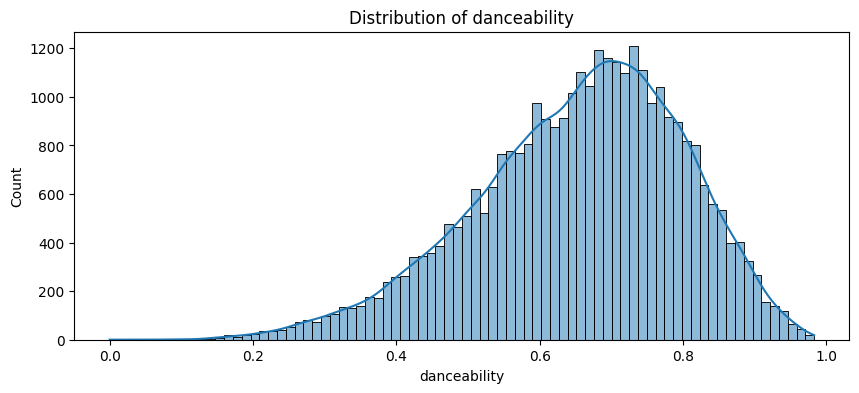

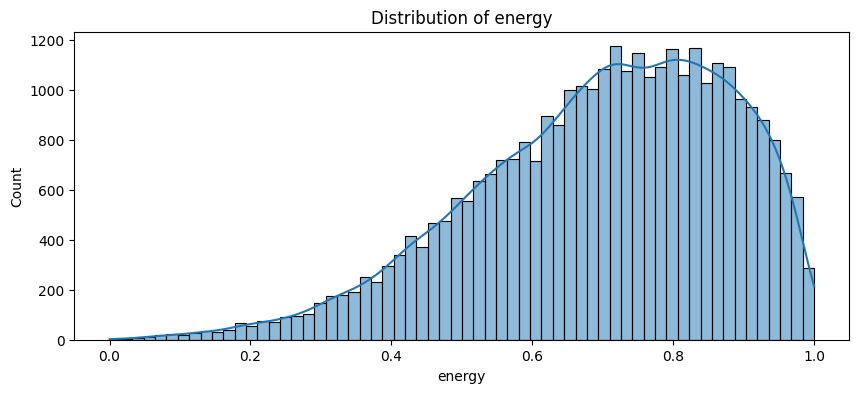

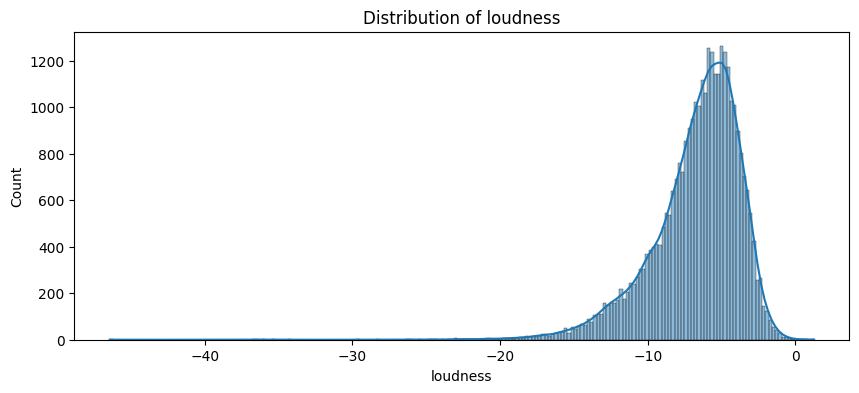

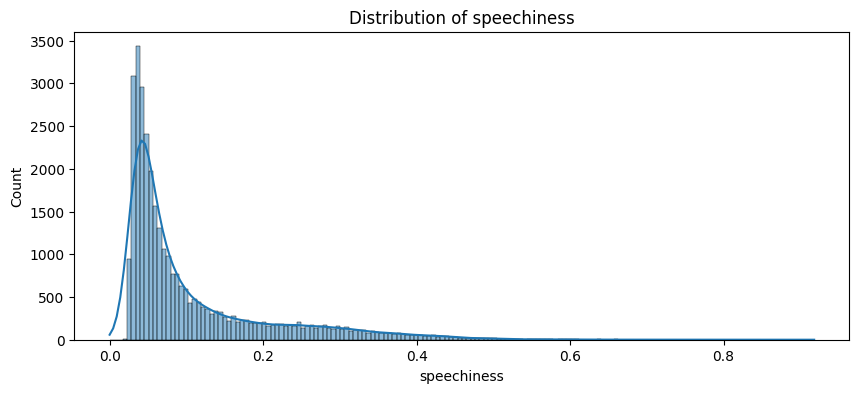

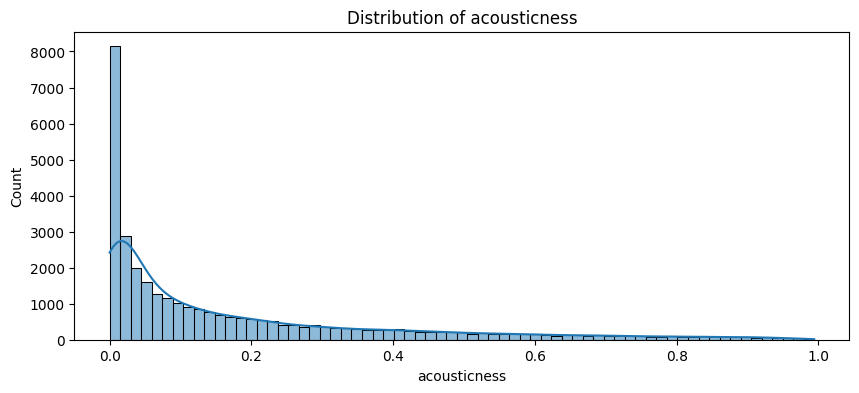

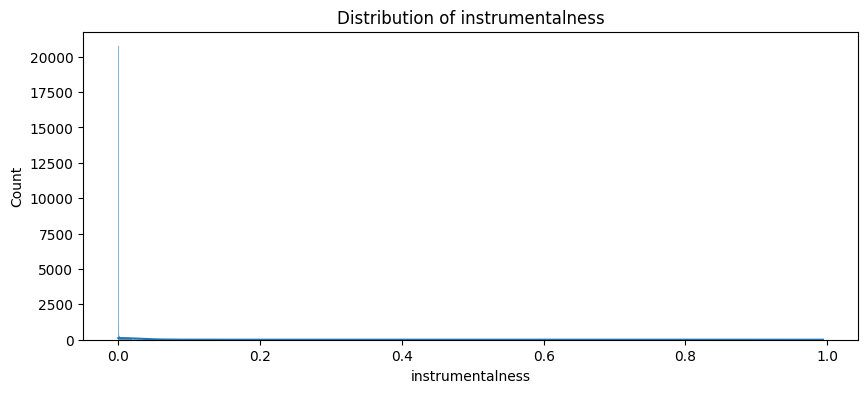

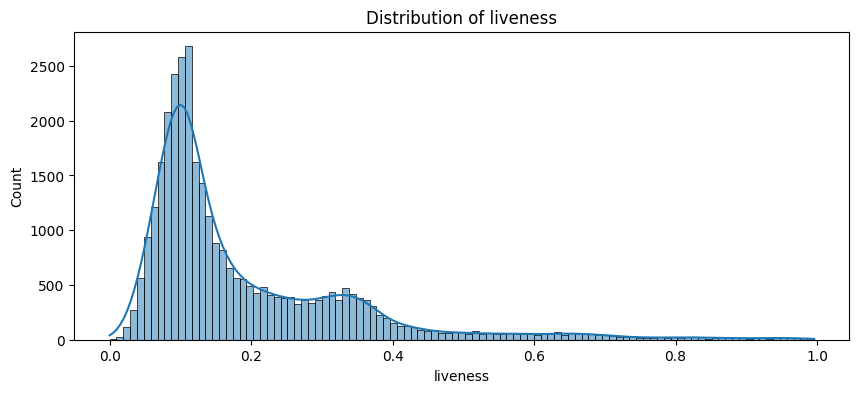

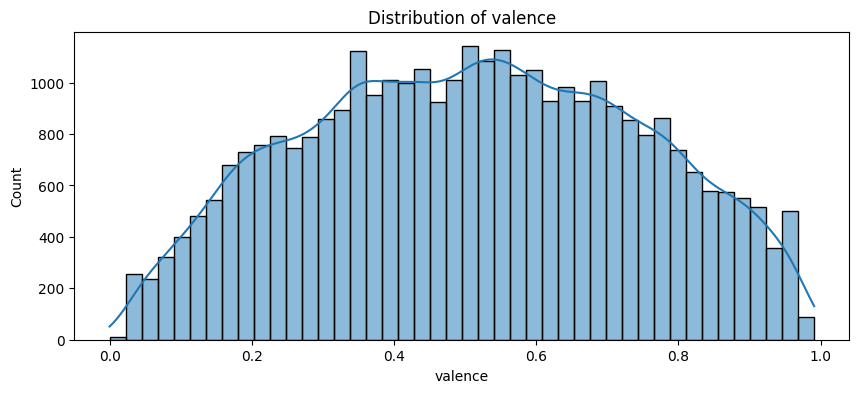

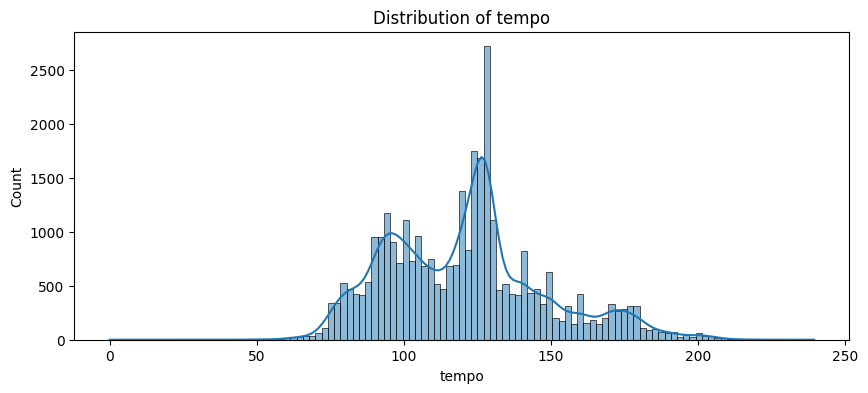

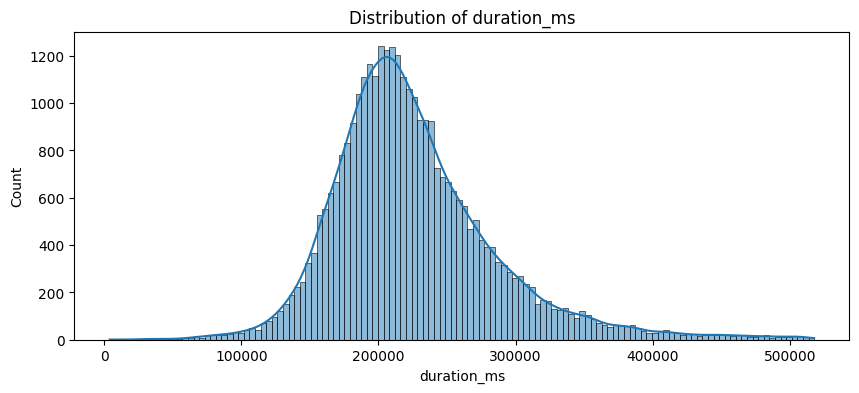

In [44]:
# Visualizing distributions in features
for feature in features:
    plt.figure(figsize=(10, 4))
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()

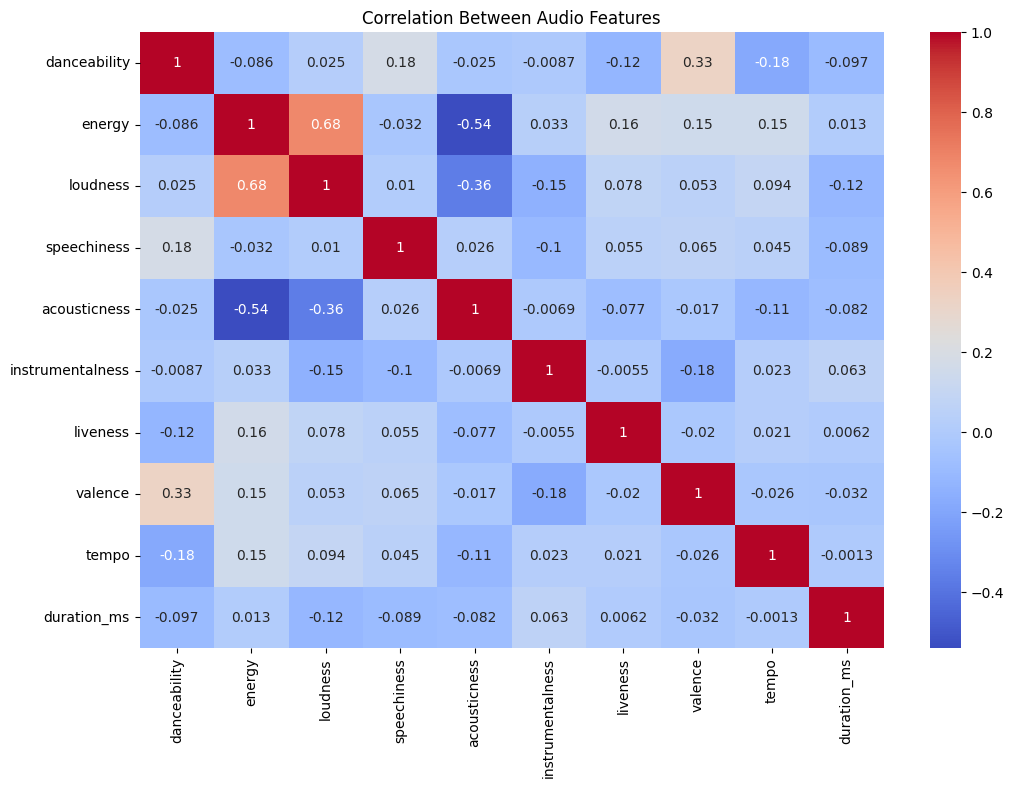

In [45]:
# Correlation heatmaps for each feature
plt.figure(figsize=(12, 8))
sns.heatmap(df[features].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Between Audio Features')
plt.show()

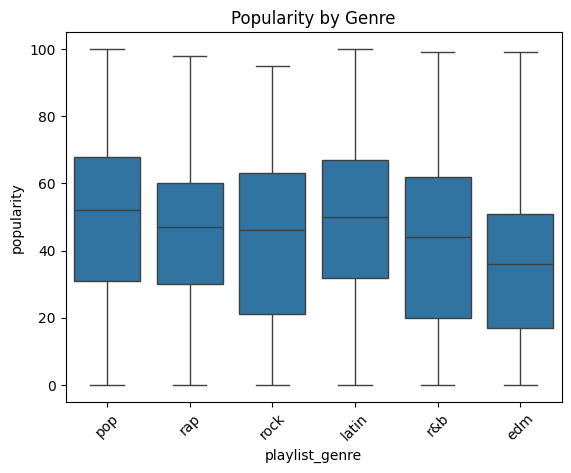

In [46]:
# Analyzing popularity by genre
sns.boxplot(data=df, x='playlist_genre', y='popularity')
plt.xticks(rotation=45)
plt.title('Popularity by Genre')
plt.show()

Prepare Data for ML


In [51]:
# Define features (X) and target (y)
X = df[features]
y = df['popularity']

In [75]:
from sklearn.preprocessing import LabelEncoder
 # Encode target
le = LabelEncoder()
y_encoded = le.fit_transform(y)

In [76]:
# Split the Data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [98]:
# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Building and training the models

In [78]:
# Training the models for classification where we will use genre
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42)
}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    print(f"\n{name} Results:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(classification_report(y_test, y_pred))


Logistic Regression Results:
Accuracy: 0.0842
              precision    recall  f1-score   support

           0       0.09      0.97      0.16       566
           1       0.00      0.00      0.00       108
           2       0.00      0.00      0.00        81
           3       0.00      0.00      0.00        56
           4       0.00      0.00      0.00        42
           5       0.00      0.00      0.00        42
           6       0.00      0.00      0.00        39
           7       0.00      0.00      0.00        35
           8       0.00      0.00      0.00        39
           9       0.00      0.00      0.00        42
          10       0.00      0.00      0.00        29
          11       0.00      0.00      0.00        32
          12       0.00      0.00      0.00        33
          13       0.00      0.00      0.00        41
          14       0.00      0.00      0.00        31
          15       0.00      0.00      0.00        36
          16       0.00      0.00 

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Random Forest Results:
Accuracy: 0.2452
              precision    recall  f1-score   support

           0       0.14      0.65      0.24       566
           1       0.09      0.06      0.08       108
           2       0.29      0.17      0.22        81
           3       0.04      0.02      0.02        56
           4       0.13      0.07      0.09        42
           5       0.23      0.17      0.19        42
           6       0.12      0.03      0.04        39
           7       0.30      0.17      0.22        35
           8       0.17      0.05      0.08        39
           9       0.09      0.02      0.04        42
          10       0.20      0.07      0.10        29
          11       0.22      0.12      0.16        32
          12       0.27      0.09      0.14        33
          13       0.37      0.17      0.23        41
          14       0.17      0.10      0.12        31
          15       0.12      0.06      0.08        36
          16       0.52      0.25      0

In [82]:
# Train regression models for popularity prediction
reg_models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42)
}

for name, model in reg_models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    print(f"\n{name} Results:")
    print(f"R² Score: {r2_score(y_test, y_pred):.4f}")
    print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.4f}")
    print(f"MAE: {mean_absolute_error(y_test, y_pred):.4f}")


Linear Regression Results:
R² Score: 0.0654
RMSE: 23.9526
MAE: 19.9685

Random Forest Results:
R² Score: -0.7281
RMSE: 32.5711
MAE: 23.4069


Model evaluation


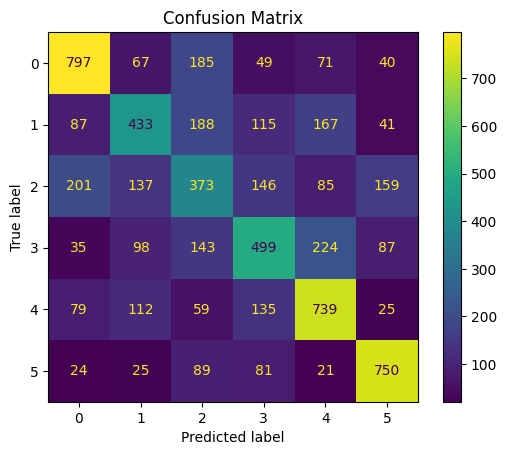

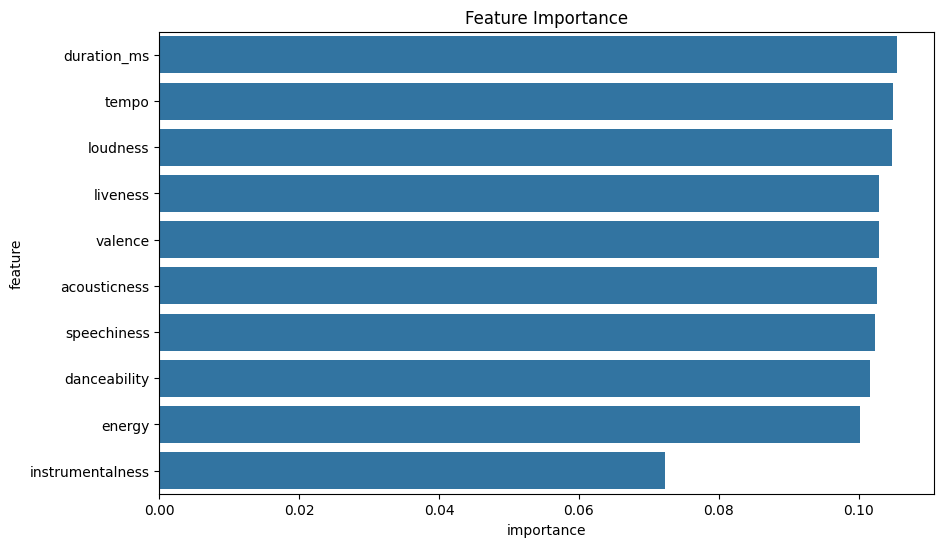

In [88]:
# Confusion Matrix (for classification)
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Confusion Matrix')
plt.show()

# Feature Importance (for tree-based models)
if hasattr(model, 'feature_importances_'):
    importances = pd.DataFrame({
        'feature': features,
        'importance': model.feature_importances_
    }).sort_values('importance', ascending=False)

    plt.figure(figsize=(10, 6))
    sns.barplot(data=importances, x='importance', y='feature')
    plt.title('Feature Importance')
    plt.show()

Hyperparameter tuning


In [92]:
# Define a smaller parameter grid for RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],        # number of trees
    'max_depth': [None, 10, 20, 30],       # depth of trees
    'min_samples_split': [2, 5, 10],       # min samples to split
    'min_samples_leaf': [1, 2, 4],         # min samples per leaf
    'bootstrap': [True, False]             # whether to use bootstrap samples
}

# Use RandomizedSearchCV instead of full GridSearchCV
random_search = RandomizedSearchCV(
    RandomForestClassifier(random_state=42),
    param_distributions=param_grid,
    n_iter=20,       # number of random combinations to try
    cv=3,            # 3-fold cross-validation
    scoring='accuracy',
    n_jobs=-1,       # use all CPU cores
    random_state=42,
    verbose=2        # optional, shows progress
)

# Fit the model
random_search.fit(X_train_scaled, y_train)

# Print the best parameters and accuracy
print("Best parameters:", random_search.best_params_)
print("Best cross-validation accuracy:", random_search.best_score_)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best parameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 20, 'bootstrap': False}
Best cross-validation accuracy: 0.5517096946157948


Training final model


In [102]:
# Train final model on ALL data
# Scale features - IMPORTANT: Fit on ALL data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Scale ALL data

print(f" X_scaled shape: {X_scaled.shape}")
print(f" y_encoded shape: {y_encoded.shape}")
print(f" Shapes match: {X_scaled.shape[0] == y_encoded.shape[0]}")

# 4. Train final model on ALL data
print("\nTraining final Random Forest model on all data...")
final_model = RandomForestClassifier(
    n_estimators=200,        # Increased from 100
    max_depth=30,            # Control overfitting
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42,
    n_jobs=-1,               # Use all CPU cores
    verbose=1                # Show progress
)

final_model.fit(X_scaled, y_encoded)

print("\n Model training complete!")


 X_scaled shape: (32828, 12)
 y_encoded shape: (32828,)
 Shapes match: True

Training final Random Forest model on all data...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    5.9s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   24.6s



 Model training complete!


[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   24.9s finished


In [103]:
# Show the feature importances
print("\nFeature Importances:")
print("-" * 50)
feature_importance = pd.DataFrame({
    'feature': audio_features,
    'importance': final_model.feature_importances_
}).sort_values('importance', ascending=False)

for idx, row in feature_importance.iterrows():
    print(f"  {row['feature']:20s}: {row['importance']:.4f}")



Feature Importances:
--------------------------------------------------
  tempo               : 0.1291
  speechiness         : 0.1221
  danceability        : 0.1172
  energy              : 0.0969
  duration_ms         : 0.0896
  valence             : 0.0892
  acousticness        : 0.0886
  loudness            : 0.0832
  instrumentalness    : 0.0760
  liveness            : 0.0586
  key                 : 0.0378
  mode                : 0.0116


In [ ]:
SAVING THE MODEL

In [105]:
# Save the model, scaler, and encoder
import joblib
print("\n" + "="*70)
print("SAVING MODEL")
print("="*70)

# Save model
joblib.dump(final_model, 'spotify_genre_classifier_final.pkl')
print("Model saved as: spotify_genre_classifier_final.pkl")

# Save scaler
joblib.dump(scaler, 'scaler_final.pkl')
print("Scaler saved as: scaler_final.pkl")

# Save label encoder
joblib.dump(le, 'label_encoder_final.pkl')
print("Label encoder saved as: label_encoder_final.pkl")

# Save feature names for reference
joblib.dump(audio_features, 'feature_names.pkl')
print("Feature names saved as: feature_names.pkl")

print("\n" + "="*70)
print("MODEL TRAINING COMPLETE!")
print("="*70)
print(f"\nModel details:")
print(f"  - Algorithm: Random Forest")
print(f"  - Number of trees: {final_model.n_estimators}")
print(f"  - Training samples: {len(X)}")
print(f"  - Features: {len(audio_features)}")
print(f"  - Classes: {len(le.classes_)}")
print(f"  - Genre labels: {', '.join(le.classes_)}")


SAVING MODEL
Model saved as: spotify_genre_classifier_final.pkl
Scaler saved as: scaler_final.pkl
Label encoder saved as: label_encoder_final.pkl
Feature names saved as: feature_names.pkl

MODEL TRAINING COMPLETE!

Model details:
  - Algorithm: Random Forest
  - Number of trees: 200
  - Training samples: 32828
  - Features: 12
  - Classes: 6
  - Genre labels: edm, latin, pop, r&b, rap, rock


Testing the model

In [106]:
# Test that the model works
print("\n" + "="*70)
print("TESTING THE SAVED MODEL")
print("="*70)

# Predict on a few samples
test_sample = X_scaled[:5]
predictions = final_model.predict(test_sample)
predicted_genres = le.inverse_transform(predictions)

print("\nSample predictions:")
for i, genre in enumerate(predicted_genres):
    print(f"  Song {i+1}: {genre}")

print("\n Model is working correctly!")


TESTING THE SAVED MODEL

Sample predictions:
  Song 1: edm
  Song 2: pop
  Song 3: edm
  Song 4: pop
  Song 5: pop

✓ Model is working correctly!


[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 200 out of 200 | elapsed:    0.1s finished


Making predictions on test data

MAKING PREDICTIONS ON TEST DATA

Generating predictions...


[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.7s
[Parallel(n_jobs=2)]: Done 200 out of 200 | elapsed:    0.7s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.


✓ Generated 6566 predictions

MODEL PERFORMANCE ON TEST DATA
Accuracy: 0.8655 (86.55%)

----------------------------------------------------------------------
CLASSIFICATION REPORT
----------------------------------------------------------------------
              precision    recall  f1-score   support

         edm       0.87      0.89      0.88      1209
       latin       0.87      0.82      0.84      1031
         pop       0.83      0.77      0.80      1101
         r&b       0.87      0.84      0.85      1086
         rap       0.86      0.90      0.88      1149
        rock       0.90      0.97      0.93       990

    accuracy                           0.87      6566
   macro avg       0.87      0.87      0.86      6566
weighted avg       0.86      0.87      0.86      6566



[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.6s
[Parallel(n_jobs=2)]: Done 200 out of 200 | elapsed:    0.6s finished



----------------------------------------------------------------------
SAMPLE PREDICTIONS (First 10)
----------------------------------------------------------------------
  Actual_Genre Predicted_Genre  Correct  Confidence
0         rock            rock     True    0.753131
1         rock             pop    False    0.478562
2          rap             rap     True    0.484833
3          r&b             r&b     True    0.455274
4          pop             pop     True    0.443284
5          pop             pop     True    0.664218
6          pop             pop     True    0.416415
7         rock            rock     True    0.446016
8         rock            rock     True    0.707847
9          rap             rap     True    0.497578

----------------------------------------------------------------------
ACCURACY BY GENRE
----------------------------------------------------------------------
              Correct_Predictions  Total  Accuracy
Actual_Genre                               

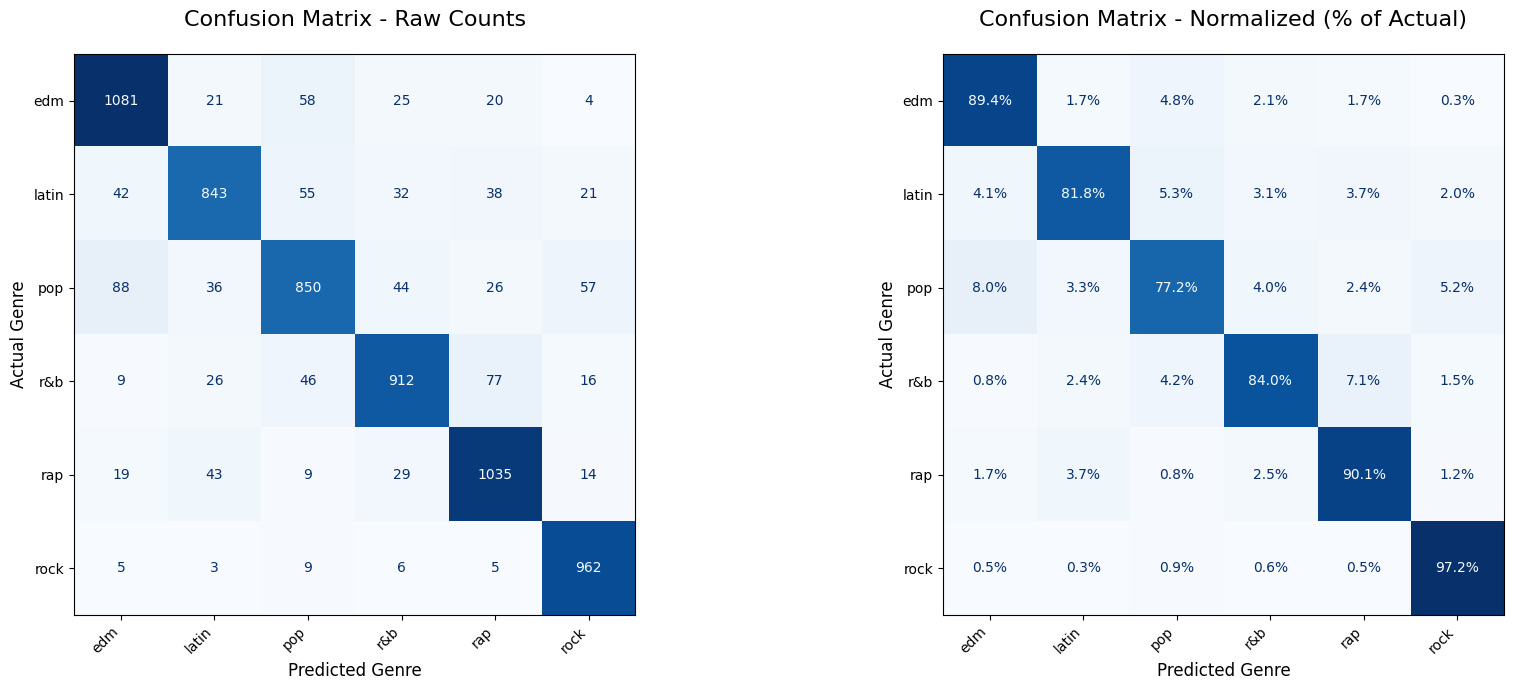


----------------------------------------------------------------------
MOST CONFUSED GENRE PAIRS
----------------------------------------------------------------------
   Actual Predicted_As  Count  Percentage
10    pop          edm     88    7.992734
18    r&b          rap     77    7.090239
1     edm          pop     58    4.797353
14    pop         rock     57    5.177112
6   latin          pop     55    5.334627
17    r&b          pop     46    4.235727
12    pop          r&b     44    3.996367
21    rap        latin     43    3.742385
5   latin          edm     42    4.073715
8   latin          rap     38    3.685742

PREDICTION SUMMARY
Total predictions: 6566
Correct: 5683 (86.55%)
Incorrect: 883 (13.45%)

----------------------------------------------------------------------
EXAMPLES OF CORRECT PREDICTIONS (High Confidence)
----------------------------------------------------------------------
     Actual_Genre Predicted_Genre  Confidence
3520          edm             edm    0.

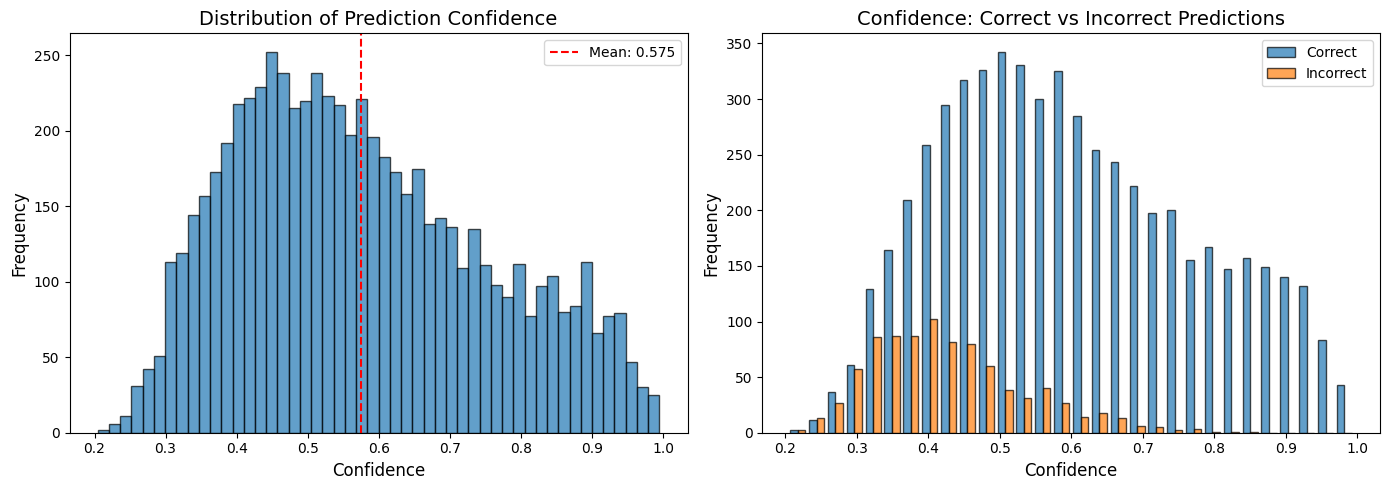


Average confidence for correct predictions: 0.598
Average confidence for incorrect predictions: 0.427

✓ Predictions saved to 'test_predictions.csv'


In [107]:
# ============================================================================
# MAKE PREDICTIONS ON TEST DATA
# ============================================================================

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

print("="*70)
print("MAKING PREDICTIONS ON TEST DATA")
print("="*70)

# 1. Make predictions on test set
print("\nGenerating predictions...")
y_pred = final_model.predict(X_test_scaled)

# Convert predictions back to genre names for better readability
y_test_labels = le.inverse_transform(y_test)
y_pred_labels = le.inverse_transform(y_pred)

print(f"✓ Generated {len(y_pred)} predictions")

# 2. Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\n{'='*70}")
print(f"MODEL PERFORMANCE ON TEST DATA")
print(f"{'='*70}")
print(f"Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")

# 3. Detailed classification report
print("\n" + "-"*70)
print("CLASSIFICATION REPORT")
print("-"*70)
print(classification_report(y_test, y_pred, target_names=le.classes_))

# 4. Create predictions DataFrame
predictions_df = pd.DataFrame({
    'Actual_Genre': y_test_labels,
    'Predicted_Genre': y_pred_labels,
    'Correct': y_test_labels == y_pred_labels
})

# Add probabilities
probabilities = final_model.predict_proba(X_test_scaled)
for i, genre in enumerate(le.classes_):
    predictions_df[f'{genre}_probability'] = probabilities[:, i]

# Add max probability (confidence)
predictions_df['Confidence'] = probabilities.max(axis=1)

print("\n" + "-"*70)
print("SAMPLE PREDICTIONS (First 10)")
print("-"*70)
print(predictions_df[['Actual_Genre', 'Predicted_Genre', 'Correct', 'Confidence']].head(10))

# 5. Accuracy by genre
print("\n" + "-"*70)
print("ACCURACY BY GENRE")
print("-"*70)
genre_accuracy = predictions_df.groupby('Actual_Genre')['Correct'].agg(['sum', 'count', 'mean'])
genre_accuracy.columns = ['Correct_Predictions', 'Total', 'Accuracy']
genre_accuracy = genre_accuracy.sort_values('Accuracy', ascending=False)
print(genre_accuracy)

# 6. Confusion Matrix
print("\n" + "-"*70)
print("CONFUSION MATRIX")
print("-"*70)

cm = confusion_matrix(y_test, y_pred)
print(f"Matrix shape: {cm.shape}")

# Plot confusion matrix
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# Raw counts
disp1 = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp1.plot(ax=axes[0], cmap='Blues', values_format='d', colorbar=False)
axes[0].set_title('Confusion Matrix - Raw Counts', fontsize=16, pad=20)
axes[0].set_xlabel('Predicted Genre', fontsize=12)
axes[0].set_ylabel('Actual Genre', fontsize=12)
plt.setp(axes[0].get_xticklabels(), rotation=45, ha='right')

# Normalized (percentages)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm_normalized, display_labels=le.classes_)
disp2.plot(ax=axes[1], cmap='Blues', values_format='.1%', colorbar=False)
axes[1].set_title('Confusion Matrix - Normalized (% of Actual)', fontsize=16, pad=20)
axes[1].set_xlabel('Predicted Genre', fontsize=12)
axes[1].set_ylabel('Actual Genre', fontsize=12)
plt.setp(axes[1].get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()

# 7. Most confused pairs
print("\n" + "-"*70)
print("MOST CONFUSED GENRE PAIRS")
print("-"*70)

confusion_pairs = []
for i in range(len(le.classes_)):
    for j in range(len(le.classes_)):
        if i != j:  # Skip diagonal
            confusion_pairs.append({
                'Actual': le.classes_[i],
                'Predicted_As': le.classes_[j],
                'Count': cm[i, j],
                'Percentage': cm_normalized[i, j] * 100
            })

confusion_df = pd.DataFrame(confusion_pairs).sort_values('Count', ascending=False)
print(confusion_df.head(10))

# 8. Correct vs Incorrect predictions summary
correct_count = predictions_df['Correct'].sum()
incorrect_count = len(predictions_df) - correct_count

print("\n" + "="*70)
print("PREDICTION SUMMARY")
print("="*70)
print(f"Total predictions: {len(predictions_df)}")
print(f"Correct: {correct_count} ({correct_count/len(predictions_df)*100:.2f}%)")
print(f"Incorrect: {incorrect_count} ({incorrect_count/len(predictions_df)*100:.2f}%)")

# 9. Examples of correct predictions
print("\n" + "-"*70)
print("EXAMPLES OF CORRECT PREDICTIONS (High Confidence)")
print("-"*70)
correct_predictions = predictions_df[predictions_df['Correct'] == True].sort_values('Confidence', ascending=False)
print(correct_predictions[['Actual_Genre', 'Predicted_Genre', 'Confidence']].head(5))

# 10. Examples of incorrect predictions
print("\n" + "-"*70)
print("EXAMPLES OF INCORRECT PREDICTIONS")
print("-"*70)
incorrect_predictions = predictions_df[predictions_df['Correct'] == False].sort_values('Confidence', ascending=False)
print(incorrect_predictions[['Actual_Genre', 'Predicted_Genre', 'Confidence']].head(5))

# 11. Confidence distribution
print("\n" + "-"*70)
print("CONFIDENCE DISTRIBUTION")
print("-"*70)

plt.figure(figsize=(14, 5))

# Overall confidence distribution
plt.subplot(1, 2, 1)
plt.hist(predictions_df['Confidence'], bins=50, edgecolor='black', alpha=0.7)
plt.xlabel('Confidence', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Distribution of Prediction Confidence', fontsize=14)
plt.axvline(predictions_df['Confidence'].mean(), color='red', linestyle='--',
            label=f'Mean: {predictions_df["Confidence"].mean():.3f}')
plt.legend()

# Confidence by correctness
plt.subplot(1, 2, 2)
correct_conf = predictions_df[predictions_df['Correct'] == True]['Confidence']
incorrect_conf = predictions_df[predictions_df['Correct'] == False]['Confidence']

plt.hist([correct_conf, incorrect_conf], bins=30, label=['Correct', 'Incorrect'],
         edgecolor='black', alpha=0.7)
plt.xlabel('Confidence', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Confidence: Correct vs Incorrect Predictions', fontsize=14)
plt.legend()

plt.tight_layout()
plt.show()

print(f"\nAverage confidence for correct predictions: {correct_conf.mean():.3f}")
print(f"Average confidence for incorrect predictions: {incorrect_conf.mean():.3f}")

# 12. Save predictions to CSV
predictions_df.to_csv('test_predictions.csv', index=False)
print("\n" + "="*70)
print(" Predictions saved to 'test_predictions.csv'")
print("="*70)